In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.plotting import plot_decision_regions

In [3]:
df = pd.read_csv("Social_Network_Ads.csv")
df.head(3)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0


In [4]:
df.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

<Axes: xlabel='Age', ylabel='EstimatedSalary'>

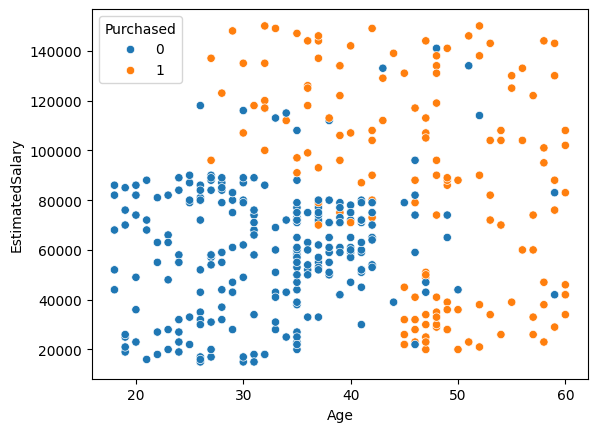

In [5]:
sns.scatterplot(x='Age',y='EstimatedSalary', data = df, hue ='Purchased')

In [6]:
x = df.iloc[:,:-1 ]
y = df["Purchased"]

In [7]:
from sklearn.preprocessing import StandardScaler

In [9]:
sc = StandardScaler()
sc.fit(x)
x = pd.DataFrame(sc.transform(x),columns = x.columns)

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [28]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [29]:
knn.score(x_test,y_test)*100

91.25

* now we check over fitting or not

In [30]:
knn.score(x_train,y_train)*100

92.5

In [27]:
for i in range (1,30):
    knn1 = KNeighborsClassifier(n_neighbors=i)
    knn1.fit(x_train,y_train)
    print(i,knn1.score(x_train,y_train)*100,knn1.score(x_test,y_test)*100)


1 99.6875 85.0
2 91.5625 86.25
3 92.5 91.25
4 91.875 92.5
5 90.9375 92.5
6 90.9375 90.0
7 91.875 93.75
8 90.625 92.5
9 91.25 93.75
10 90.625 92.5
11 90.9375 92.5
12 91.25 92.5
13 91.5625 92.5
14 90.625 92.5
15 90.625 92.5
16 90.0 92.5
17 90.625 92.5
18 90.0 92.5
19 90.9375 92.5
20 90.0 93.75
21 90.3125 92.5
22 90.0 93.75
23 90.3125 93.75
24 89.375 93.75
25 90.0 93.75
26 89.375 93.75
27 89.375 92.5
28 88.75 93.75
29 88.75 93.75


* here we can see 3 number is the  best for this time

In [34]:
knn.predict ([[-0.253587,-1.460681]])

C:\Users\Asus\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0])

* here we can check this and what we get 1 or 0 

In [35]:
x,y

(          Age  EstimatedSalary
 0   -1.781797        -1.490046
 1   -0.253587        -1.460681
 2   -1.113206        -0.785290
 3   -1.017692        -0.374182
 4   -1.781797         0.183751
 ..        ...              ...
 395  0.797057        -0.844019
 396  1.274623        -1.372587
 397  1.179110        -1.460681
 398 -0.158074        -1.078938
 399  1.083596        -0.990844
 
 [400 rows x 2 columns],
 0      0
 1      0
 2      0
 3      0
 4      0
       ..
 395    1
 396    1
 397    1
 398    0
 399    1
 Name: Purchased, Length: 400, dtype: int64)

C:\Users\Asus\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


<Axes: >

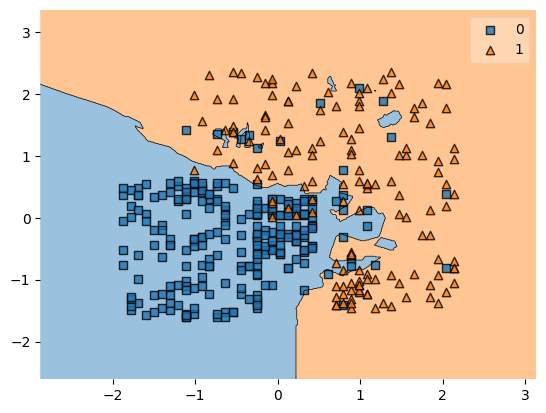

In [38]:
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf = knn)